<a href="https://colab.research.google.com/github/CodeWithSridhar/Innomatics-Internship/blob/main/Movie_Recommendation_System_Sri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  🎥 ***Movies Recommender System***🎥 

**About the Dataset**:🎬

The dataset consists of  metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.


**Dataset:📂**

https://www.kaggle.com/rounakbanik/movie-recommender-systems/data

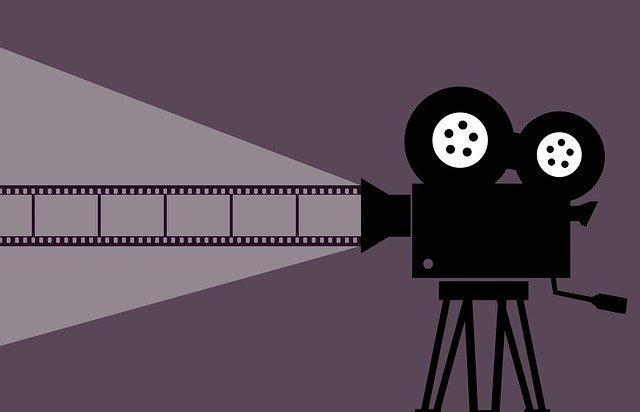

**Dataset Description**: 📝

This dataset consists of the following files:

⚡ **movies_metadata.csv**: 

The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

⚡ **keywords.csv**:

 Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.


⚡ **credits.csv**: 

Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.


⚡ **links.csv**: 

The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

⚡ **links_small.csv**: 

Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.


⚡ **ratings_small.csv**: 

The subset of 100,000 ratings from 700 users on 9,000 movies.

# Problem Statement:❓
Using different techniques of Machine Learning, we need to build a Recommender System that recommends movies based on “ Cast, Genre, Reviews, TMDB/IMDB ratings”

Using different types of recommendation techniques like:
1. Popularity based recommender system
2. Content based Recommender System
3. Collaborative Recommender System

In [ ]:
#importing necessary modules

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
# mounting the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading data
path = '/content/drive/MyDrive/Innomatics Research Labs/Movier_Recommendation_System_Final_Project/'

### **Movies Dataset**

In [ ]:
movies = pd.read_csv(path+'movies_metadata.csv', sep=',', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
movies.shape

(45466, 24)

In [ ]:
movies.isnull()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
45462,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
45463,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45464,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### **Credits** **Dataset**

In [ ]:
credits = pd.read_csv(path+'credits.csv', sep=',', encoding='latin-1')

In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, ...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', 'gender': 2, 'id': 2178, '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': ...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gender': 2, 'id': 37, 'job': ...",11862


In [ ]:
credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [ ]:
credits.shape

(45476, 3)

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
credits.isnull()

,cast,crew,id
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
45471,False,False,False
45472,False,False,False
45473,False,False,False
45474,False,False,False


In [ ]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

### **Keywords**

In [ ]:
keywords = pd.read_csv(path+'keywords.csv', sep=',', encoding='latin-1')

In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}, {'id': 15101, 'nam..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392, 'name': 'best friend'}, {'id': 179431, 'name': '..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id': 10131, 'name': 'interracial relationship'}, {'id'..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'name': 'midlife crisis'}, {'id': 2246, 'name': 'con..."


In [ ]:
keywords.columns

Index(['id', 'keywords'], dtype='object')

In [ ]:
keywords.shape

(46419, 2)

In [ ]:
keywords.isnull()

,id,keywords
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
46414,False,False
46415,False,False
46416,False,False
46417,False,False


In [ ]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

### **Links**

In [ ]:
links  = pd.read_csv(path+'links.csv', sep=',', encoding='latin-1')

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [ ]:
links.shape

(45843, 3)

In [ ]:
links.isnull()

,movieId,imdbId,tmdbId
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
45838,False,False,False
45839,False,False,False
45840,False,False,False
45841,False,False,False


In [ ]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

### **Links_Small**

In [ ]:
links_small = pd.read_csv(path+'links_small.csv', sep=',', encoding='latin-1')

In [ ]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links_small.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [ ]:
links_small.shape

(9125, 3)

In [ ]:
links_small.isnull()

,movieId,imdbId,tmdbId
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9120,False,False,False
9121,False,False,False
9122,False,False,False
9123,False,False,False


In [ ]:
links_small.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

### **Ratings_small**

In [ ]:
ratings_small  = pd.read_csv(path+'ratings_small.csv', sep=',', encoding='latin-1')

In [ ]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
ratings_small.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
ratings_small.shape

(100004, 4)

In [ ]:
ratings_small.isnull()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99999,False,False,False,False
100000,False,False,False,False
100001,False,False,False,False
100002,False,False,False,False


In [ ]:
ratings_small.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies.iloc[0:3].transpose()

,0,1,2
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet..."
budget,3e+07,6.5e+07,NaN
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
original_language,en,en,en
overview,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John...
popularity,21.9469,17.0155,11.7129
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIRbceoE9lR4veEXuwCC2wARtG.jpg' style='height:100px;'>,<img src='http://image.tmdb.org/t/p/w185//vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg' style='height:100px;'>,<img src='http://image.tmdb.org/t/p/w185//6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg' style='height:100px;'>
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Communications]","[Warner Bros., Lancaster Gate]"


### **Attributes of Movies Dataset**:

    adult: Indicates if the movie is X-Rated or Adult.
    belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
    budget: The budget of the movie in dollars.
    genres: A stringified list of dictionaries that list out all the genres associated with the movie.
    homepage: The Official Homepage of the move.
    id: The ID of the move.
    imdb_id: The IMDB ID of the movie.
    original_language: The language in which the movie was originally shot in.
    original_title: The original title of the movie.
    overview: A brief blurb of the movie.
    popularity: The Popularity Score assigned by TMDB.
    poster_path: The URL of the poster image.
    production_companies: A stringified list of production companies involved with the making of the movie.
    production_countries: A stringified list of countries where the movie was shot/produced in.
    release_date: Theatrical Release Date of the movie.
    revenue: The total revenue of the movie in dollars.
    runtime: The runtime of the movie in minutes.
    spoken_languages: A stringified list of spoken languages in the film.
    status: The status of the movie (Released, To Be Released, Announced, etc.)
    tagline: The tagline of the movie.
    title: The Official Title of the movie.
    video: Indicates if there is a video present of the movie with TMDB.
    vote_average: The average rating of the movie.
    vote_count: The number of votes by users, as counted by TMDB.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

☘ Total ***movies*** present in the dataset: ***45466***

☘ Total Attributes: **24**

☘ Nan-values are present in the dataset

In [ ]:
movies = movies.drop(['imdb_id','original_title'], axis=1)

✍ Removed some of the features like '**imdb_id**' and '**original_title**' which are not important to us.


In [ ]:
movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
movies[movies['revenue'] == 0].shape

(38052, 22)

✍ Many of the movies have a revenue of 0 so, this shows that we do not have information about the total revenue for these movies.

In [ ]:
movies['revenue'] = movies['revenue'].replace(0, np.nan)

✍ converted this into a numeric variable and replaced all the non-numeric values with NaN.

In [ ]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['budget'] = movies['budget'].replace(0, np.nan)
movies[movies['budget'].isnull()].shape

(36576, 22)

In [ ]:
movies['return'] = movies['revenue'] / movies['budget']
movies[movies['return'].isnull()].shape

(40085, 23)

In [ ]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [ ]:
movies['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by ÃrnÃ¥s                                                                                                                 1
Name: adult, dtype: int64

In [ ]:
movies = movies.drop('adult', axis=1)

In [ ]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
movies['poster_path'] = "<img src='" + base_poster_url + movies['poster_path'] + "' style='height:100px;'>"

In [ ]:
movies['title'] = movies['title'].astype('str')
movies['overview'] = movies['overview'].astype('str')

In [ ]:
title_corpus = ' '.join(movies['title'])
overview_corpus = ' '.join(movies['overview'])

### **Wordcloud**:

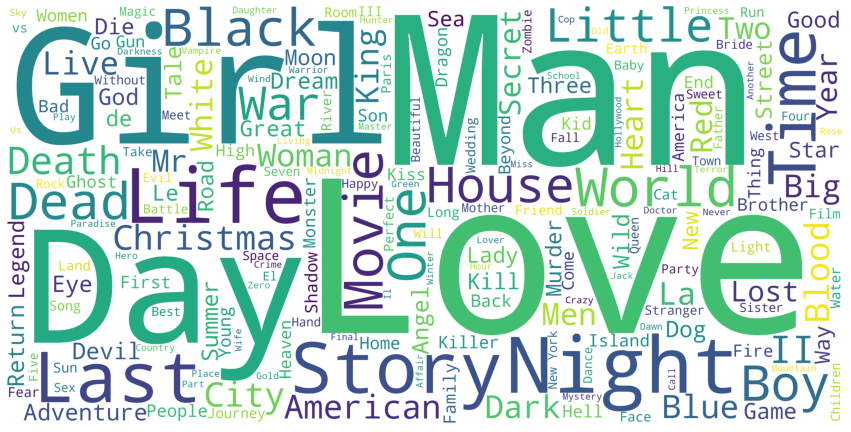

In [ ]:
from wordcloud import WordCloud, STOPWORDS
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(15,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

✍ Words like **Love**, **day**, **girl**, **man**, **night** and **life** are the most common word used in the movie titles. These wordclouds give us a pretty good idea of the most popular themes present in movies.

### Production Countries

In [ ]:
import ast
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
s = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
con_movies = movies.drop('production_countries', axis=1).join(s)
con_movies = pd.DataFrame(con_movies['countries'].value_counts())
con_movies['country'] = con_movies.index
con_movies.columns = ['num_movies', 'country']
con_mvies = con_movies.reset_index().drop('index', axis=1)
con_movies.head(10)

,num_movies,country
United States of America,21153,United States of America
United Kingdom,4094,United Kingdom
France,3940,France
Germany,2254,Germany
Italy,2169,Italy
Canada,1765,Canada
Japan,1648,Japan
Spain,964,Spain
Russia,912,Russia
India,828,India


In [ ]:
con_movies = con_movies[con_movies['country'] != 'United States of America']

### **Franchise Movies**

In [ ]:
movies_fran = movies[movies['belongs_to_collection'].notnull()]
movies_fran['belongs_to_collection'] = movies_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
movies_fran = movies_fran[movies_fran['belongs_to_collection'].notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Highest Grossing Movie Franchises**

In [ ]:
fran_pivot = movies_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [ ]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


✍ Harry Potter Franchise is the most successful movie franchise raking in more than 7.707 billion dollars followed by star wars and james bond franchise.

**Most Successful Movie Franchises (by Average Gross)**

In [ ]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


✍ **Avatar Collection** consisting of only one movie present, is the most successful franchise of all time with the movie raking to 2.8 billion dollars.

 **Longest Running Franchises**

In [ ]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,PokÃ©mon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


✍ James Bond Movies is the largest franchise ever with over 26 movies released under the banner. Friday the 13th and Pokemon come in at a distant second and third with 12 and 11 movies respectively.

### **Production Companies**

In [ ]:
movies['production_companies'] = movies['production_companies'].fillna('[]').apply(ast.literal_eval)
movies['production_companies'] = movies['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
s = movies.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
com_movies = movies.drop('production_companies', axis=1).join(s)

In [ ]:
com_sum = pd.DataFrame(com_movies.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_movies.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_movies.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

 **Highest Earning Production Companies**

In [ ]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


✍ Warner Bros is the highest earning production company of all time earning a staggering 63.5 billion dollars from close to 500 movies. Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 55 billion dollars and 48 billion dollars in revenue respectively.

**Most Succesful Production Companies**

In [ ]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


### Original Language

In [ ]:
movies['original_language'].drop_duplicates().shape[0]

93

In [ ]:
lang_movies = pd.DataFrame(movies['original_language'].value_counts())
lang_movies['language'] = lang_movies.index
lang_movies.columns = ['number', 'language']
lang_movies.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


✍There are over 93 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Italian movies come at a very distant second and third respectively. Let us represent the most popular languages (apart from English) in the form of a bar plot.

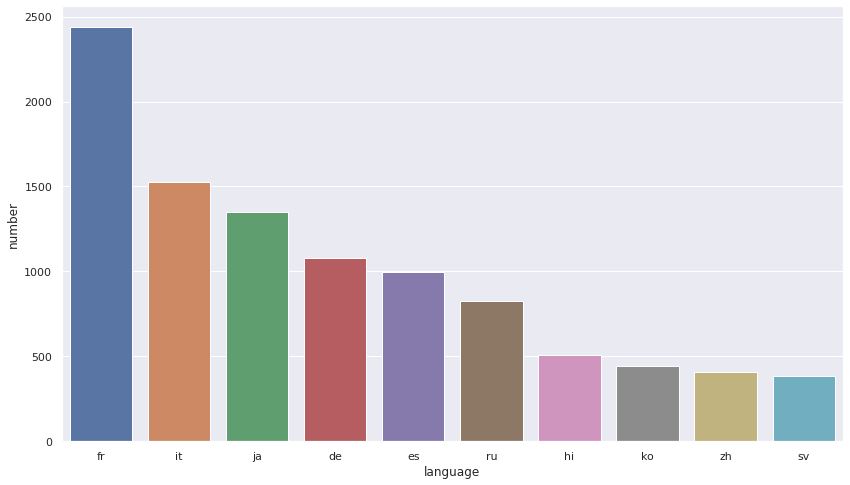

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='language', y='number', data=lang_movies.iloc[1:11])
plt.show()

✍  French and Italian are the most commonly occurring languages after English. Japanese and Hindi form the majority as far as Asian Languages are concerned.

### **Popularity, Vote Average and Vote Count**

In [ ]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
movies['popularity'] = movies['popularity'].apply(clean_numeric).astype('float')
movies['vote_count'] = movies['vote_count'].apply(clean_numeric).astype('float')
movies['vote_average'] = movies['vote_average'].apply(clean_numeric).astype('float')

In [ ]:
movies['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



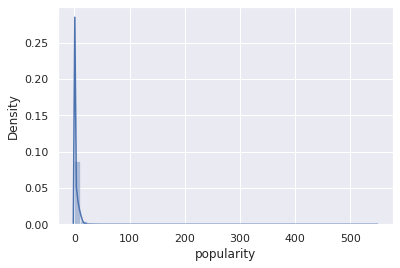

In [ ]:
sns.distplot(movies['popularity'].fillna(movies['popularity'].median()))
plt.show()

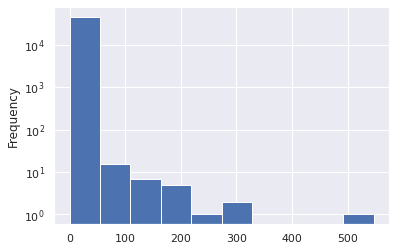

In [ ]:
movies['popularity'].plot(logy=True, kind='hist')

✍ The Popularity score seems to be an extremely skewed quentity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

**Most Popular Movies by Popularity Score**

In [ ]:
movies[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


✍ Minions is the most popular movie by the TMDB Popularity Score. Wonder Woman and Beauty and the Beast, two extremely successful woman centric movies come in second and third respectively.

**Most Voted on Movies**

In [ ]:
movies[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


✍ Inception and The Dark Knight, two critically acclaimed and commercially successful Christopher Nolan movies figure at the top of our chart.

In [ ]:
movies['vote_average'] = movies['vote_average'].replace(0, np.nan)
movies['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



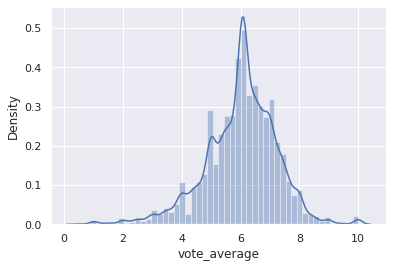

In [ ]:
sns.distplot(movies['vote_average'].fillna(movies['vote_average'].median()))

✍ It appears that TMDB Users are extremely strict in their ratings. The mean rating is only a 5.6 on a scale of 10. Half the movies have a rating of less than or equal to 6. Let us check what the most critically acclaimed movies as per TMDB are. We will only consider those movies that have more than 2000 votes (similar to IMDB's criteria of 5000 votes in selecting its top 250).

### Most Critically Acclaimed Movies

In [ ]:
movies[movies['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


✍ The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores

### Movie Release Dates

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [ ]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [ ]:
movies['day'] = movies['release_date'].apply(get_day)
movies['month'] = movies['release_date'].apply(get_month)

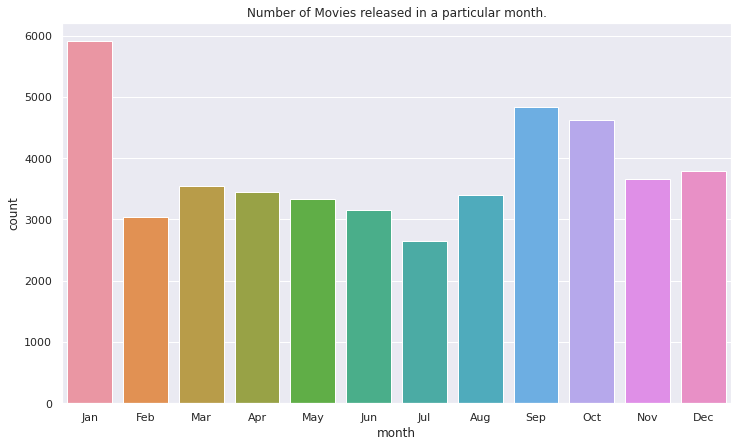

In [ ]:
plt.figure(figsize=(12,7))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=movies, order=month_order)

✍ January is the most popular month when it comes to movie releases. In Hollywood circles, this is also known as the the dump month when sub par movies are released by the dozen.

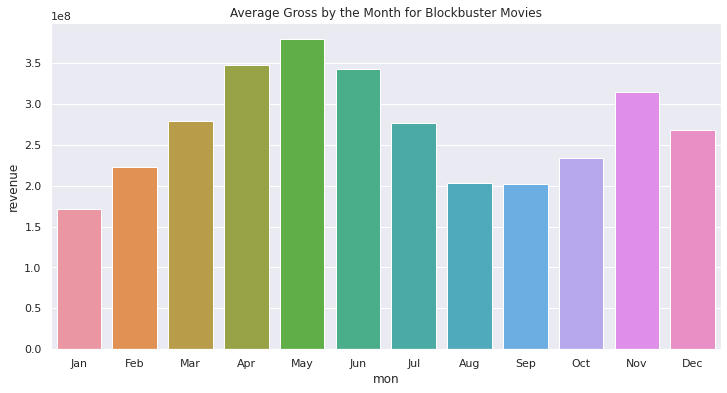

In [ ]:
month_mean = pd.DataFrame(movies[movies['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

✍  months of April, May and June have the highest average gross among high grossing movies. This can be attributed to the fact that blockbuster movies are usually released in the summer when the kids are out of school and the parents are on vacation and therefore, the audience is more likely to spend their disposable income on entertainment.

(0.0, 12.0)

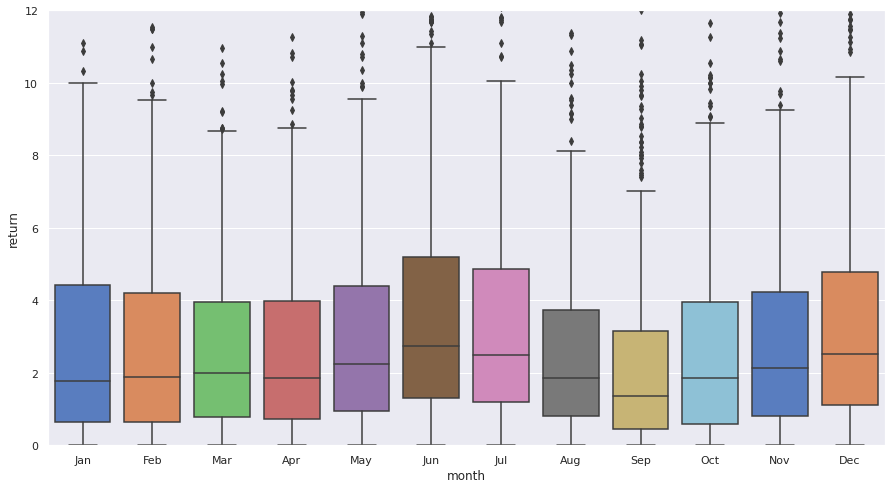

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=movies[movies['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

✍ Months of June and July tend to yield the highest median returns. September is the least successful months on the aforementioned metrics. Again, the success of June and July movies can be attributed to them being summer months and times of vacation. September usually denotes the beginning of the school/college semester and hence a slight reduction in the consumption of movies.

### Number of Movies by the year

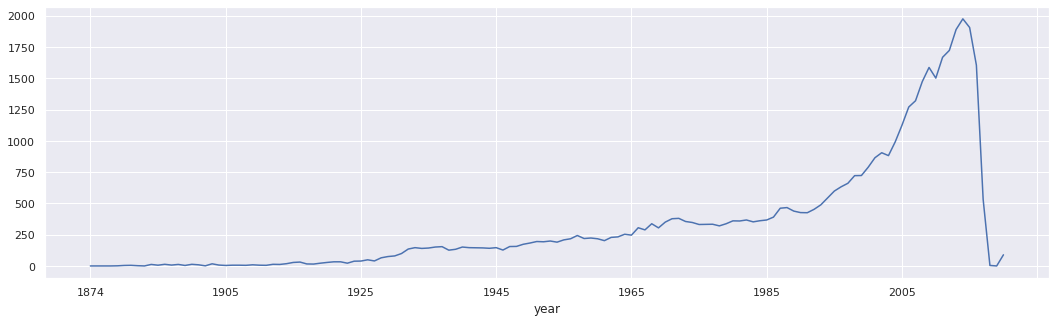

In [ ]:
year_count = movies.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

✍ We notice that there is a sharp rise in the number of movies starting the 1990s decade. However, we will not look too much into this as it is entirely possible that recent movies were oversampled for the purposes of this dataset.

### Earliest Movies Represented

In [ ]:
movies[movies['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34934,Accordion Player,1888
34938,Traffic Crossing Leeds Bridge,1888
34936,"Monkeyshines, No. 2",1890
34939,London's Trafalgar Square,1890
34935,"Monkeyshines, No. 1",1890
41194,Mosquinha,1890


✍ The oldest movie, Passage of Venus, wss a series of photographs of the transit of the planet Venus across the Sun in 1874. They were taken in Japan by the French astronomer Pierre Janssen using his 'photographic revolver'. This is also the oldest movie on both IMDB and TMDB.

In [ ]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [ ]:
movies_21 = movies.copy()
movies_21['year'] = movies_21[movies_21['year'] != 'NaT']['year'].astype(int)
movies_21 = movies_21[movies_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=movies_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

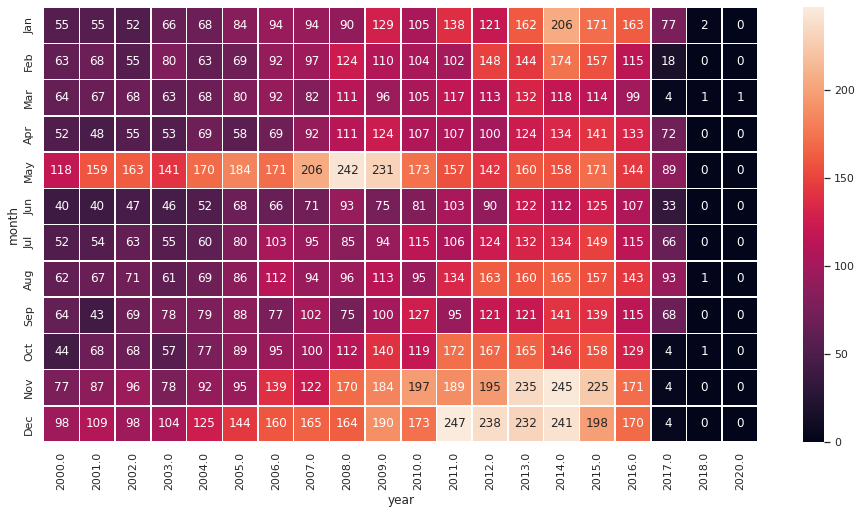

In [ ]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

### Spoken Languages

In [ ]:
movies['spoken_languages'].value_counts()

[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                                         22395
[]                                                                                                                                                                                                                3829
[{'iso_639_1': 'fr', 'name': 'FranÃ§ais'}]                                                                                                                                                                        1853
[{'iso_639_1': 'ja', 'name': 'æ¥æ¬èª'}]                                                                                                                                                                        1289
[{'iso_639_1': 'it', 'name': 'Italiano'}]                                                                                                   

In [ ]:
movies[movies['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


✍ The movie with the most number of languages, Visions of Europe is actually a collection of 25 short films by 25 different European directors. This explains the sheer diversity of the movie in terms of language.

### Shortest Movies

In [ ]:
movies[movies['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
35146,1.0,La Vague,1891
36577,1.0,Champs de Mars,1900
36576,1.0,Palace of Electricity,1900
44965,1.0,"Luis Martinetti, Contortionist",1894
42357,1.0,A Gathering of Cats,2007
36575,1.0,Eiffel Tower from Trocadero Palace,1900
36574,1.0,Panorama of Eiffel Tower,1900
44714,1.0,The Infernal Caldron,1903
19244,1.0,The Kiss,1896
44646,1.0,The Vanishing Lady,1896


✍ We see that every movie in this list except A Gathering of Cats were filmed in the late 1890s and the beginning of the 20th century. All these movies were one minute long.

### Longest Movies

In [ ]:
movies[movies['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
40938,1140.0,Baseball,1994
19965,1140.0,Jazz,2001
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


✍ We notice that almost all the entries in the above chart are actually miniseries and hence, do not count as feature length films. We cannot gather too much insight from this list of longest movies as there is no way of distinguishing feature length films from TV Mini Series from our dataset (except, of course, by doing it manually).

### Budget

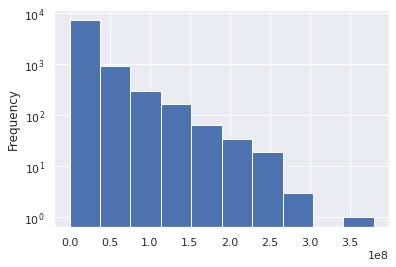

In [ ]:
movies['budget'].plot(logy=True, kind='hist')

✍ The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 25 million dollars. Next, let us take a look at the most expensive movies of all time and the revenue & returns that they generated.

### Most Expensive Movies of all Time

In [ ]:
movies[movies['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013


✍ Two Pirates of the Carribean films occupy the top spots in this list with a staggering budget of over 300 million dollars. All the top 10 most expensive films made a profit on their investment except for The Lone Ranger which managed to recoup less than 35% of its investment, taking in a paltry 90 million dollars on a 255 million dollar budget.

### Highest Grossing Films of All Time

In [ ]:
gross_top = movies[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


### Most Successful Movies

In [ ]:
movies[(movies['return'].notnull()) & (movies['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


### Worst Movies

In [ ]:
movies[(movies['return'].notnull()) & (movies['budget'] > 5e6) & (movies['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


## ***Correlation matrix***

In [ ]:
movies['year'] = movies['year'].replace('NaT', np.nan)

In [ ]:
movies['year'] = movies['year'].apply(clean_numeric)

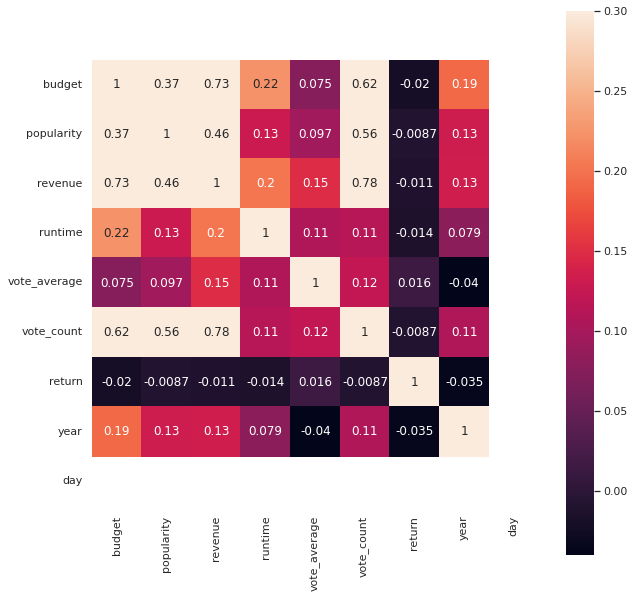

In [ ]:
sns.set(font_scale=1)
corr = movies.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(corr,vmax=.3, square=True, annot=True)

## Genres

In [ ]:
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
gen_movies = movies.drop('genres', axis=1).join(s)

In [ ]:
gen_movies['genre'].value_counts().shape[0]

32

✍ TMDB defines 32 different genres for our set of 45,000 movies. Let's have a look at the most commonly occuring genres in movies.

In [ ]:
pop_gen = pd.DataFrame(gen_movies['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


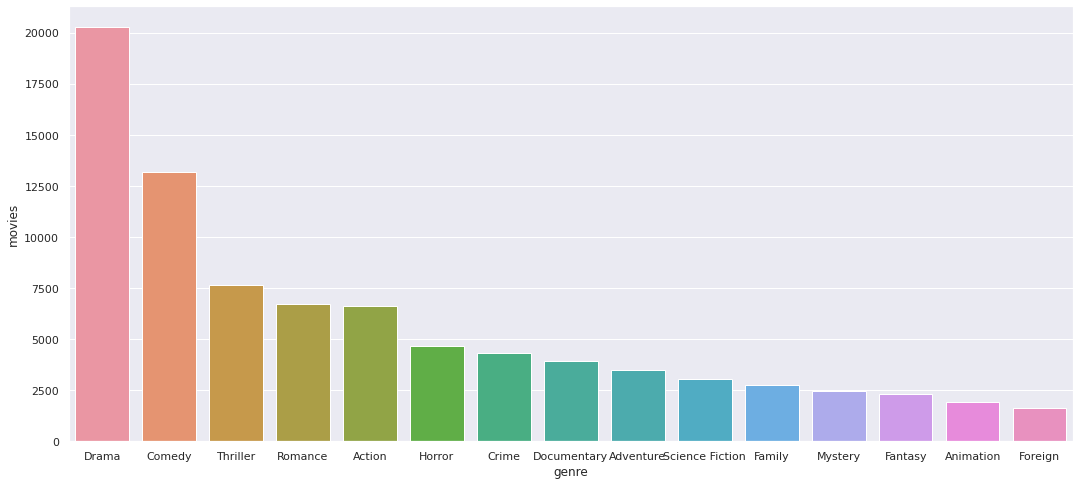

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

Drama is the most commonly occurring genre with almost half the movies identifying itself as a drama film. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

# Cast and Crew

In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, ...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', 'gender': 2, 'id': 2178, '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': ...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gender': 2, 'id': 37, 'job': ...",11862


✍ We need to perform a left join of our original movies metadata dataframe with the credits dataframe on the TMDB Movie ID. Before we are able to perform this join, we need to make sure that the ID column of our main dataframe is clean and of type integer. To do this, let us try to perform an integer conversion of our IDs and if an exception is raised,we will replace the ID with NaN. We will then proceed to drop these rows from our dataframe.

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
movies['id'] = movies['id'].apply(convert_int)

In [ ]:
movies[movies['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainment, Telescene Film Group Productions]","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'LU', 'name': 'Luxembourg'}, {'iso_3166_...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midnight Man' style='height:100px;'>,[],[],1,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble Production Committee, Sentai Filmworks]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'JP', 'name': 'Japan'}]",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardock Scramble: The Third Exhaust' style='height:100p...,[],[],12,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue State, The Cartel]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avalanche Sharks' style='height:100px;'>,[],[],22,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movies = movies.drop([19730, 29503, 35587])

In [ ]:
movies['id'] = movies['id'].astype('int')

In [ ]:
movies = movies.merge(credits, on='id')
movies.shape

(45538, 27)

In [ ]:
movies['cast'] = movies['cast'].apply(ast.literal_eval)
movies['crew'] = movies['crew'].apply(ast.literal_eval)

In [ ]:
movies['cast_size'] = movies['cast'].apply(lambda x: len(x))
movies['crew_size'] = movies['crew'].apply(lambda x: len(x))

In [ ]:
movies['cast'] = movies['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
movies['director'] = movies['crew'].apply(get_director)

In [ ]:
s = movies.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_movies = movies.drop('cast', axis=1).join(s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



### Actors with the Highest Total Revenue

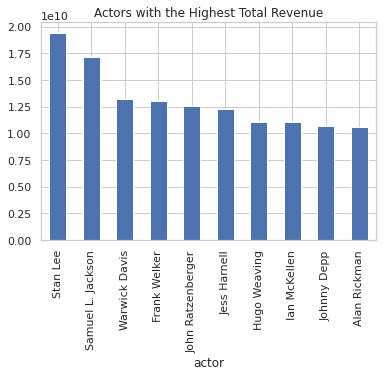

In [ ]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_movies.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Directors with the Highest Total Revenue

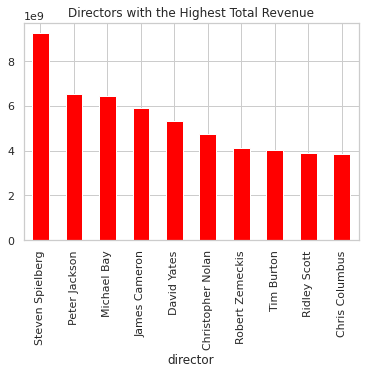

In [ ]:
plt.title('Directors with the Highest Total Revenue')
movies.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

In [ ]:
actor_list = cast_movies.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = movies.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

### Most Successful Actors

In [ ]:
success_df = cast_movies[(cast_movies['return'].notnull()) & (cast_movies['revenue'] > 1e7) & (cast_movies['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

,return
actor,
Jami Gertz,3.099099e+06
Donna Mitchell,2.479289e+06
Andrew McCarthy,2.479280e+06
Nicholas Pryor,1.770914e+06
James Spader,1.549551e+06
Michael Bowen,1.033038e+06
Robert Downey Jr.,5.165189e+05
Martin Kove,3.395458e+05
William Zabka,3.395441e+05


### Most Successful Directors

In [ ]:
success_df = movies[(movies['return'].notnull()) & (movies['revenue'] > 1e7) & (movies['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
John G. Avildsen,169822.750468
George A. Romero,60.656935
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532


✍ John G. Avildsen has an unnaturally high return. All the other directors in the list are nowhere close to the level of return that he has gained. Let us have a look at his movies.

In [ ]:
movies[(movies['director'] == 'John G. Avildsen') & (movies['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

,title,budget,revenue,return,year
1853,Rocky,1000000.0,117235147.0,1.172351e+02,1976.0
2307,Rocky V,42000000.0,119946358.0,2.855866e+00,1990.0
2315,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984.0
2316,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0
5226,Joe,106000.0,19319254.0,1.822571e+02,1970.0
5658,Neighbors,8500000.0,29916207.0,3.519554e+00,1981.0


The Karate Kid, Part II has a budget of only 113 dollars. This seems like an anomaly since official figures state that the movie cost 13 million dollars. So, although he has directed amazing movies, he does not belong to this list.

# **Building recommendation system**



# **Simple recommendation system**

**Approach**:

The Simple Recommender offers generalized recommendations to every user based on movie popularity and (sometimes) genre.

The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience.

This model does not give personalized recommendations based on the user.

**What we are actually doing**:

The implementation of this model is extremely trivial.
All we have to do is sort our movies based on ratings and popularity and display the top movies of our list.
As an added step, we can pass in a genre argument to get the top movies of a particular genre.
I will build our overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

In [ ]:
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] 
                                                                       if isinstance(x, list) else [])

IMDB's weighted rating formula
Mathematically, it is represented as follows:

Weighted Rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
 
 

where,

v is the number of votes for the movie

m is the minimum votes required to be listed in the chart

R is the average rating of the movie


C is the mean vote across the whole report

Now, determine an cutoff value for m, the minimum votes required to be listed in the chart.

in this model used cutoff is 95th percentile that means for a movie to feature in the top N must have more votes than at least 95% of the movies in the list.

In [ ]:
# Claculation of c 
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

In [ ]:
## Claculation of m
m = vote_counts.quantile(0.95)
m

434.0

In [ ]:
# extracting release year from release_date
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] 
                                                                           if x != np.nan else np.nan)

In [ ]:
# Getting qualified movies (cutoff: 95%)
col_list = ['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']
qualified = movies[(movies['vote_count'] >= m) 
                 & (movies['vote_count'].notnull()) 
                 & (movies['vote_average'].notnull())][col_list]

# converting vote_count and vote_average colums to integer
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

Findings as follow:

for consideration in the chart, a movie has to have at least 434 votes. 

the average rating for a movie is 5.244 on a scale of 10.

2274 Movies qualify to be on the chart.

## Calculating weighted ratings and making top 250 chart

In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
qualified['weighted_rating'] = qualified.apply(weighted_rating, axis=1)

In [ ]:
qualified = qualified.sort_values('weighted_rating', ascending=False).head(250)

In [ ]:
# Top 10 Movies
qualified.head(10)

,title,year,vote_count,vote_average,popularity,genres,weighted_rating
15480,Inception,2010,14075,8,29.1081,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.2135,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.95,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.6454,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.3072,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.4235,"[Adventure, Fantasy, Action]",7.851924


5 out 10 movies of genres drama. Also three Christopher Nolan Films, Inception, The Dark Knight and Interstellar are part of top 10 list. The list coins a strong bias towards meta data like genres, directors etc.

Now, building list for particular genres. For that, cutoff is relaxed to 85% instead of 95.

In [ ]:
s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_movies = movies.drop('genres', axis=1).join(s)
gen_movies.head(3).transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,0,0,0
adult,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,30000000,30000000,30000000
homepage,http://toystory.disney.com/toy-story,http://toystory.disney.com/toy-story,http://toystory.disney.com/toy-story
id,862,862,862
imdb_id,tt0114709,tt0114709,tt0114709
original_language,en,en,en
original_title,Toy Story,Toy Story,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ..."
popularity,21.9469,21.9469,21.9469


In [ ]:
def build_chart(genre, percentile=0.85):
    df = gen_movies[gen_movies['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & 
                   (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: 
                        (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C),
                        axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

✍ Let us see our method in action by displaying the Top 15 Romance Movies (Romance almost didn't feature at all in our Generic Top Chart despite being one of the most popular movie genres).

In [ ]:
# Top 10 Romance Movies

build_chart('Romance').head(10)


,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457,8.565285
351,Forrest Gump,1994,8147,8,48.3072,7.971357
876,Vertigo,1958,1162,8,18.2082,7.811667
40251,Your Name.,2016,1030,8,34.461252,7.789489
883,Some Like It Hot,1959,835,8,11.8451,7.745154
1132,Cinema Paradiso,1988,834,8,14.177,7.744878
19901,Paperman,2012,734,8,7.19863,7.713951
37863,Sing Street,2016,669,8,10.672862,7.689483
882,The Apartment,1960,498,8,11.9943,7.599317
38718,The Handmaiden,2016,453,8,16.727405,7.566166


# **Content based recommendation system**

In [ ]:
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [ ]:
## Pre-processing step

def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
movies['id'] = movies['id'].apply(convert_int)
movies[movies['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
19730,- Written by ÃrnÃ¥s,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': 'æ¥æ¬èª'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
movies = movies.drop([19730, 29503, 35587])

In [ ]:
movies['id'] = movies['id'].astype('int')

In [ ]:
smd = movies[movies['id'].isin(links_small)]
smd.shape

(9099, 25)

✍ We have 9099 movies available in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

### **Content based recommendation system : Using movie description and taglines**

Let us first try to build a recommender using movie descriptions and taglines.

We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [ ]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [ ]:
tfidf_matrix.shape

(9099, 268961)

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score.

Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [ ]:
# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#cosine_sim.shape
cosine_sim[0]

array([1.        , 0.00680459, 0.        , ..., 0.        , 0.00289435,
       0.        ])

We now have a pairwise cosine similarity matrix for all the movies in our dataset.

The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])
indices.head(2)

title
Toy Story    0
Jumanji      1
dtype: int64

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

Let us now try and get the top recommendations for a few movies and see how good the recommendations are..

In [ ]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8387                 The Family
3509                       Made
4196         Johnny Dangerously
29               Shanghai Triad
5667                       Fury
2412             American Movie
1582    The Godfather: Part III
4221                    8 Women
2159              Summer of Sam
Name: title, dtype: object

In [ ]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
8165    Batman: The Dark Knight Returns, Part 1
2696                                        JFK
Name: title, dtype: object

We see that for The Dark Knight, our system is able to identify it as a Batman film and subsequently recommend other Batman films as its top recommendations.

But unfortunately, that is all this system can do at the moment.

This is not of much use to most people as it doesn't take into considerations very important features such as cast, crew, director and genre, which determine the rating and the popularity of a movie.

Someone who liked The Dark Knight probably likes it more because of Nolan and would hate Batman Forever and every other substandard movie in the Batman Franchise.

Therefore, we are going to use much more suggestive metadata than Overview and Tagline.
In the next subsection, we will build a more sophisticated recommender that takes genre, keywords, cast and crew into consideration.